# WFE and PSF Metrics for VisMCAO
2000 actuators, 6 LGS (7mag), 1 TT (8mag)

In [1]:
from paarti.utils import maos_utils
import matplotlib.pyplot as plt
from bpeck.mcao import act_study

In [3]:
#act_study.print_mag_to_flux(2000, 6000, 1000, 7, 8)

In [9]:
total = maos_utils.print_wfe_metrics(seed=1)

---------------------
WaveFront Error (nm): [note, piston removed from all]
---------------------
Field Avg        Total   High_Order           TT
---------  -----------   ----------   ----------
Open            1877.6       1021.0       1575.7
Closed           389.6        371.4        117.6

Pos  0 
-------  
Open            1721.1        986.0       1410.6
Closed           173.0        136.7        106.0

Pos  1 
-------  
Open            1744.7        992.8       1434.7
Closed           176.7        146.6         98.7

Pos  2 
-------  
Open            1776.7       1005.2       1465.0
Closed           176.8        151.3         91.5

Pos  3 
-------  
Open            1812.8       1016.5       1501.1
Closed           167.4        144.1         85.1

Pos  4 
-------  
Open            1848.9       1025.9       1538.2
Closed           177.8        159.4         78.8

Pos  5 
-------  
Open            1883.2       1031.3       1575.7
Closed           219.5        206.1         75.5

Pos

## WFE: Total, Tip-Tilt and High-Order

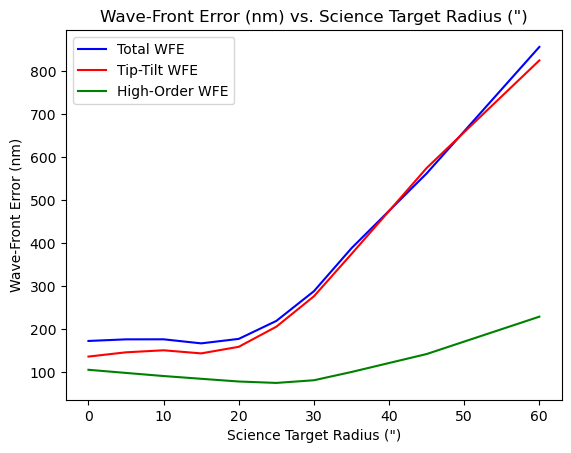

In [13]:
total_wfe = [173.0, 176.7, 176.8, 167.4, 177.8, 219.5, 288.5, 388.4, 562.1, 856.0]
tt_wfe = [136.7, 146.6, 151.3, 144.1, 159.4, 206.1, 276.7, 375.0, 574.7, 824.7]
truth_wfe = [106.0, 98.7, 91.5, 85.1, 78.8, 75.5, 81.7, 100.9, 142.6, 229.4]

psf = [0, 5, 10, 15, 20, 25, 30, 35, 45, 60]
plt.plot(psf, total_wfe, color='blue', label="Total WFE")
plt.plot(psf, tt_wfe, color='red', label="Tip-Tilt WFE")
plt.plot(psf, truth_wfe, color='green', label="High-Order WFE" )
plt.title('Wave-Front Error (nm) vs. Science Target Radius (")')
plt.xlabel('Science Target Radius (")')
plt.ylabel("Wave-Front Error (nm)")
plt.legend()
plt.show()

## Setup

In [14]:
import pylab as plt
import numpy as np
from paarti.utils import maos_utils
from paarti import psfs, psf_plots

psf_x = [0, 5, 10, 15, 20, 25, 30, 35, 45, 60]  # arcsec
psf_y = [0, 0,  0,  0,  0,  0,  0,  0,  0,  0]  # arcsec
psf_wvl = [432, 544, 652, 810, 877, 1020, 1248, 1673, 2200]

seed = 1

%matplotlib inline

In [15]:
mets = maos_utils.get_psf_metrics_over_field(seed=seed)
x, y, w, strehl, fwhm_g, fwhm_e, r_ee50, r_ee80 = mets

Looking in ./ for simulation results...
xx =  0 yy =  0
xx =  5 yy =  0
xx =  10 yy =  0
xx =  15 yy =  0
xx =  20 yy =  0
xx =  25 yy =  0
xx =  30 yy =  0
xx =  35 yy =  0
xx =  45 yy =  0
xx =  60 yy =  0


In [16]:
x.shape

(10, 9)

## Strehl

Text(0.5, 1.0, 'Science Target Radius (") vs. Strehl')

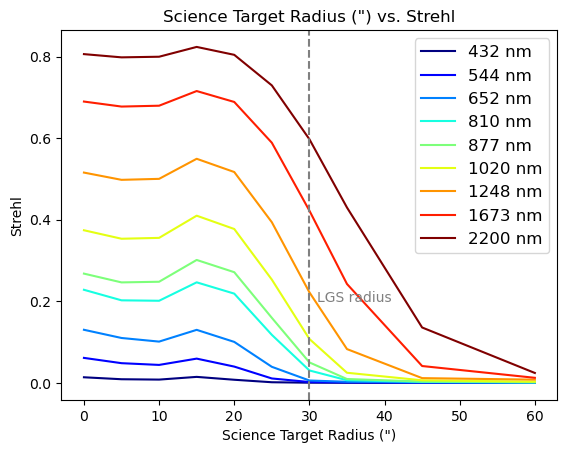

In [17]:
n_wvl = x.shape[1]
colors = plt.cm.jet(np.linspace(0,1,n_wvl))

plt.figure(1)

for ww in range(n_wvl):
    label = f'{w[0, ww]*1e3:3.0f} nm'
    plt.plot(x[:, ww], strehl[:, ww], color=colors[ww], label=label)    

plt.legend(fontsize=12)
plt.xlabel('Science Target Radius (")')
plt.ylabel('Strehl')
plt.axvline(30, linestyle='--', color='grey')
plt.text(31, 0.2, 'LGS radius', color='grey')
plt.title('Science Target Radius (") vs. Strehl')

## Empirical FWHM

Text(0.5, 1.0, 'Science Target Radius (") vs. Emp. FWHM (mas)')

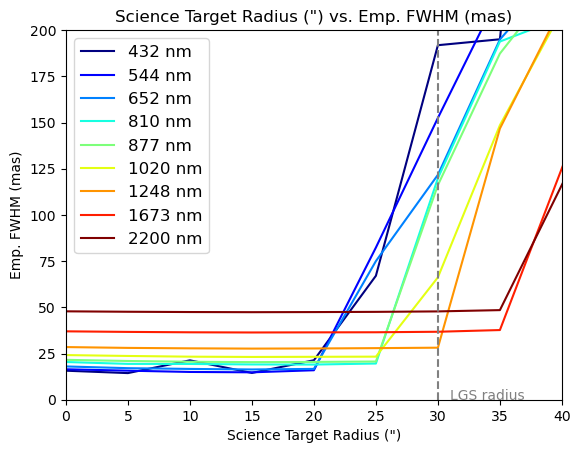

In [18]:
n_wvl = x.shape[1]
colors = plt.cm.jet(np.linspace(0,1,n_wvl))

plt.figure(1)

for ww in range(n_wvl):
    label = f'{w[0, ww]*1e3:3.0f} nm'
    plt.plot(x[:, ww], fwhm_e[:, ww], color=colors[ww], label=label)    

plt.legend(fontsize=12)
plt.xlabel('Science Target Radius (")')
plt.ylabel('Emp. FWHM (mas)')
plt.axvline(30, linestyle='--', color='grey')
plt.xlim(0, 40)
plt.ylim(0, 200)
plt.text(31, 0.2, 'LGS radius', color='grey')
plt.title('Science Target Radius (") vs. Emp. FWHM (mas)')

## Encircled Energy (50 and 80)

Text(0.5, 1.0, 'Science Target Radius (") vs. EE80 Radius (mas)')

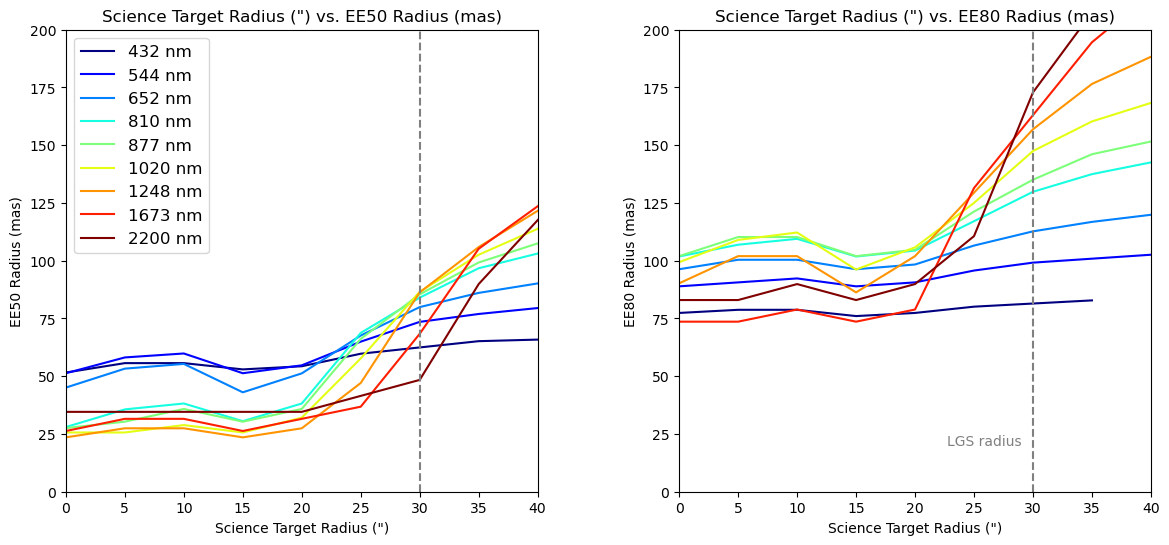

In [19]:
n_wvl = x.shape[1]
colors = plt.cm.jet(np.linspace(0,1,n_wvl))

fig, axs = plt.subplots(1, 2, figsize=(14, 6))
fig.subplots_adjust(wspace=0.3)
    
for ww in range(n_wvl):
    label = f'{w[0, ww]*1e3:3.0f} nm'
    axs[0].plot(x[:, ww], r_ee50[:, ww], color=colors[ww], label=label)    
    axs[1].plot(x[:, ww], r_ee80[:, ww], color=colors[ww])    

axs[0].legend(fontsize=12)
axs[0].set_xlabel('Science Target Radius (")')
axs[1].set_xlabel('Science Target Radius (")')
axs[0].set_ylabel('EE50 Radius (mas)')
axs[1].set_ylabel('EE80 Radius (mas)')
axs[0].axvline(30, linestyle='--', color='grey')
axs[1].axvline(30, linestyle='--', color='grey')
axs[0].set_xlim(0, 40)
axs[0].set_ylim(0, 200)
axs[1].set_xlim(0, 40)
axs[1].set_ylim(0, 200)
axs[1].text(29, 20, 'LGS radius', color='grey', ha='right')
axs[0].set_title('Science Target Radius (") vs. EE50 Radius (mas)')
axs[1].set_title('Science Target Radius (") vs. EE80 Radius (mas)')